## **Task 1 : Exploratory Data Analysis (EDA) [3 marks]**
### Preprocessing


From CombineScript.py

In [3]:
# Library imports
import pandas as pd
import numpy as np
import os 


# Give the path of the test and train folder of UCI HAR Dataset
train_path = "./UCI HAR Dataset/train"
test_path = "./UCI HAR Dataset/test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING',
}

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Combining Traing Data
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(train_path, "Inertial Signals", "total_acc_x_train.txt"), delim_whitespace=True,
                          header=None)
total_acc_y = pd.read_csv(os.path.join(train_path, "Inertial Signals", "total_acc_y_train.txt"), delim_whitespace=True,
                          header=None)
total_acc_z = pd.read_csv(os.path.join(train_path, "Inertial Signals", "total_acc_z_train.txt"), delim_whitespace=True,
                          header=None)

# Read the subject IDs
subject_train = pd.read_csv(os.path.join(train_path, "subject_train.txt"), delim_whitespace=True, header=None)

# Read the labels
y = pd.read_csv(os.path.join(train_path, "y_train.txt"), delim_whitespace=True, header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where(subject_train.iloc[:, 0] == subject)[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined", "Train", ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined", "Train", ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:, 0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx, total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy, total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz, total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx': accx, 'accy': accy, 'accz': accz})
        save_path = os.path.join("Combined", "Train", ACTIVITIES[label], f"Subject_{subject}.csv")
        data.to_csv(save_path, index=False)

print("Done Combining the training data")

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Combining Test Data
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(test_path, "Inertial Signals", "total_acc_x_test.txt"), delim_whitespace=True,
                          header=None)
total_acc_y = pd.read_csv(os.path.join(test_path, "Inertial Signals", "total_acc_y_test.txt"), delim_whitespace=True,
                          header=None)
total_acc_z = pd.read_csv(os.path.join(test_path, "Inertial Signals", "total_acc_z_test.txt"), delim_whitespace=True,
                          header=None)

# Read the subject IDs
subject_test = pd.read_csv(os.path.join(test_path, "subject_test.txt"), delim_whitespace=True, header=None)

# Read the labels
y = pd.read_csv(os.path.join(test_path, "y_test.txt"), delim_whitespace=True, header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):

    sub_idxs = np.where(subject_test.iloc[:, 0] == subject)[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        if not os.path.exists(os.path.join("Combined", "Test", ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined", "Test", ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:, 0] == label].index

        accx = []
        accy = []
        accz = []
        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx, total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy, total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz, total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx': accx, 'accy': accy, 'accz': accz})
        save_path = os.path.join("Combined", "Test", ACTIVITIES[label], f"Subject_{subject}.csv")
        data.to_csv(save_path, index=False)

print("Done Combining the testing data")
print("Done Combining the data")

# Creation of raw dataset

x = pd.read_csv(os.path.join(train_path,"X_train.txt"), delim_whitespace=True, header=None)
featurel = pd.read_csv(os.path.join("./UCI HAR Dataset","features.txt"), delim_whitespace=True, header=None)
featurelist = list(featurel.loc[:,1])
x.columns = featurelist
yg = pd.read_csv(os.path.join(train_path,"y_train.txt"), delim_whitespace=True, header=None)
xtest = pd.read_csv(os.path.join(test_path,"X_test.txt"), delim_whitespace=True, header=None)
xtest.columns = featurelist
ytest = pd.read_csv(os.path.join(test_path,"y_test.txt"), delim_whitespace=True, header=None)

# -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


C:\Users\romit\AppData\Local\Temp\ipykernel_8312\3101670265.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv(os.path.join(train_path, "Inertial Signals", "total_acc_x_train.txt"), delim_whitespace=True,
C:\Users\romit\AppData\Local\Temp\ipykernel_8312\3101670265.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv(os.path.join(train_path, "Inertial Signals", "total_acc_y_train.txt"), delim_whitespace=True,
C:\Users\romit\AppData\Local\Temp\ipykernel_8312\3101670265.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_z = pd.read_csv(os.path.join(train_path, "Inertial Signals", "total_acc_z_train.txt"), delim_whitespace=True,
C:\User

Done Combining the training data


C:\Users\romit\AppData\Local\Temp\ipykernel_8312\3101670265.py:81: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv(os.path.join(test_path, "Inertial Signals", "total_acc_x_test.txt"), delim_whitespace=True,
C:\Users\romit\AppData\Local\Temp\ipykernel_8312\3101670265.py:83: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv(os.path.join(test_path, "Inertial Signals", "total_acc_y_test.txt"), delim_whitespace=True,
C:\Users\romit\AppData\Local\Temp\ipykernel_8312\3101670265.py:85: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_z = pd.read_csv(os.path.join(test_path, "Inertial Signals", "total_acc_z_test.txt"), delim_whitespace=True,
C:\Users\romi

Done Combining the testing data
Done Combining the data


C:\Users\romit\AppData\Local\Temp\ipykernel_8312\3101670265.py:132: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  x = pd.read_csv(os.path.join(train_path,"X_train.txt"), delim_whitespace=True, header=None)
C:\Users\romit\AppData\Local\Temp\ipykernel_8312\3101670265.py:133: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  featurel = pd.read_csv(os.path.join("./UCI HAR Dataset","features.txt"), delim_whitespace=True, header=None)
C:\Users\romit\AppData\Local\Temp\ipykernel_8312\3101670265.py:136: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  yg = pd.read_csv(os.path.join(train_path,"y_train.txt"), delim_whitespace=True, header=None)
C:\Users\romit\AppData\Local\Temp\ipykernel_8312\3101670265.py:137: Fu

From MakeDataset.py

In [3]:
# Library imports
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# plt.style.use('dark_background') # for dark background of plts

# Constants
time = 10
offset = 100
folders = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]
classes = {"WALKING": 1, "WALKING_UPSTAIRS": 2, "WALKING_DOWNSTAIRS": 3, "SITTING": 4, "STANDING": 5, "LAYING": 6}

combined_dir = os.path.join("Combined")

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Train Dataset
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train = []
y_train = []
dataset_dir = os.path.join(combined_dir, "Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir, folder))

    for file in files:
        df = pd.read_csv(os.path.join(dataset_dir, folder, file), sep=",", header=0)
        df = df[offset:offset + time * 50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Test Dataset
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test = []
y_test = []
dataset_dir = os.path.join(combined_dir, "Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir, folder))
    for file in files:
        df = pd.read_csv(os.path.join(dataset_dir, folder, file), sep=",", header=0)
        df = df[offset:offset + time * 50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Final Dataset
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)

print("Training data shape: ", X_train.shape)
print("Testing data shape: ", X_test.shape)

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


## Questions

### 1. Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data? [0.5 marks]


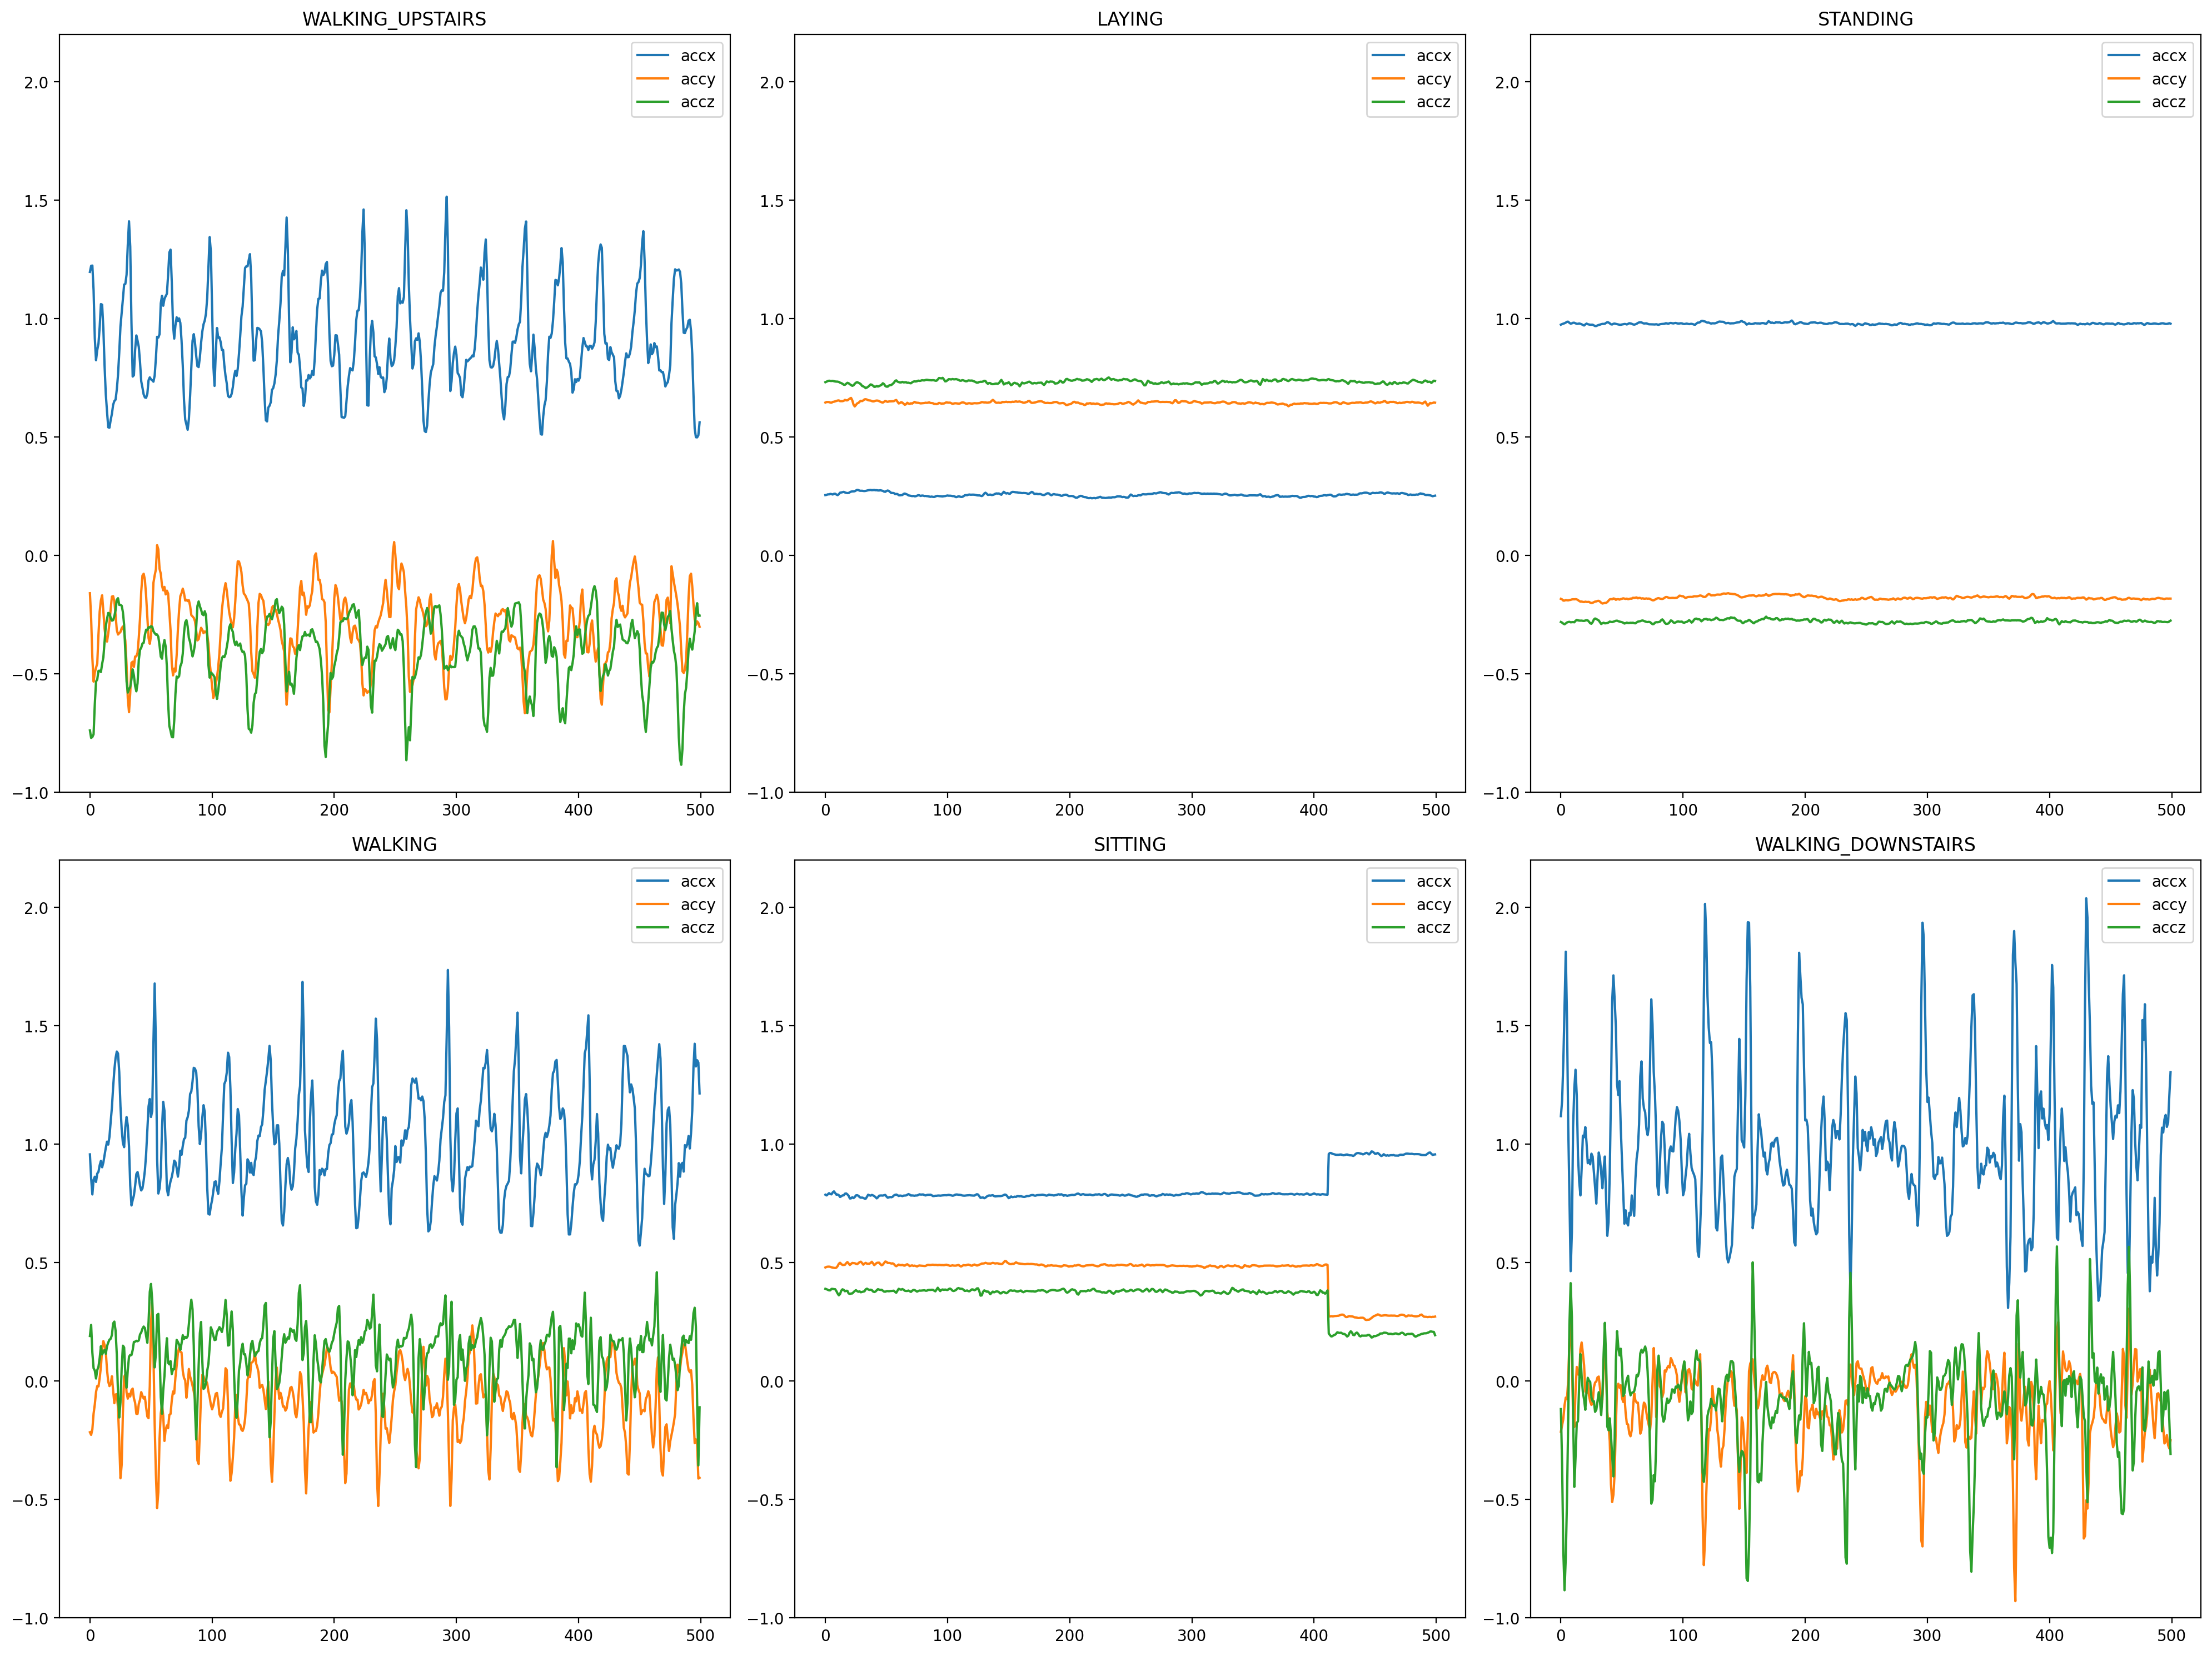

In [11]:
# Plotting graphs for different labels occurring first in y_train
ACTIVITIES = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING',
}
d = {}
fig = plt.figure(figsize=(20, 15))

c=0
for i,j in enumerate(y_train):
  if j not in d:
    data = X_train[i]
    ax = fig.add_subplot(2, 3, c+1)
    ax.plot(data[:,0],label="accx")
    ax.plot(data[:,1],label="accy")
    ax.plot(data[:,2],label="accz")
    ax.set_ylim(-1, 2.2)
    ax.set_title(ACTIVITIES[j])
    plt.legend()
    d[j] = X_train[i]
    c+=1

plt.tight_layout()
plt.show()

# classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

#### Since there are considerable visible variations between the activities' data, which can be further enhanced by techniques like feature engineering and dimensionality reduction; The model should be able to classify the different activities based on the data.

### 2. Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration for each activity and justify your answer. [0.5 marks]

Standard deviations in Linear Acceleration in each of the activities:
WALKING 0.0229
WALKING_UPSTAIRS 0.025
WALKING_DOWNSTAIRS 0.0413
SITTING 0.0182
STANDING 0.0071
LAYING 0.0154


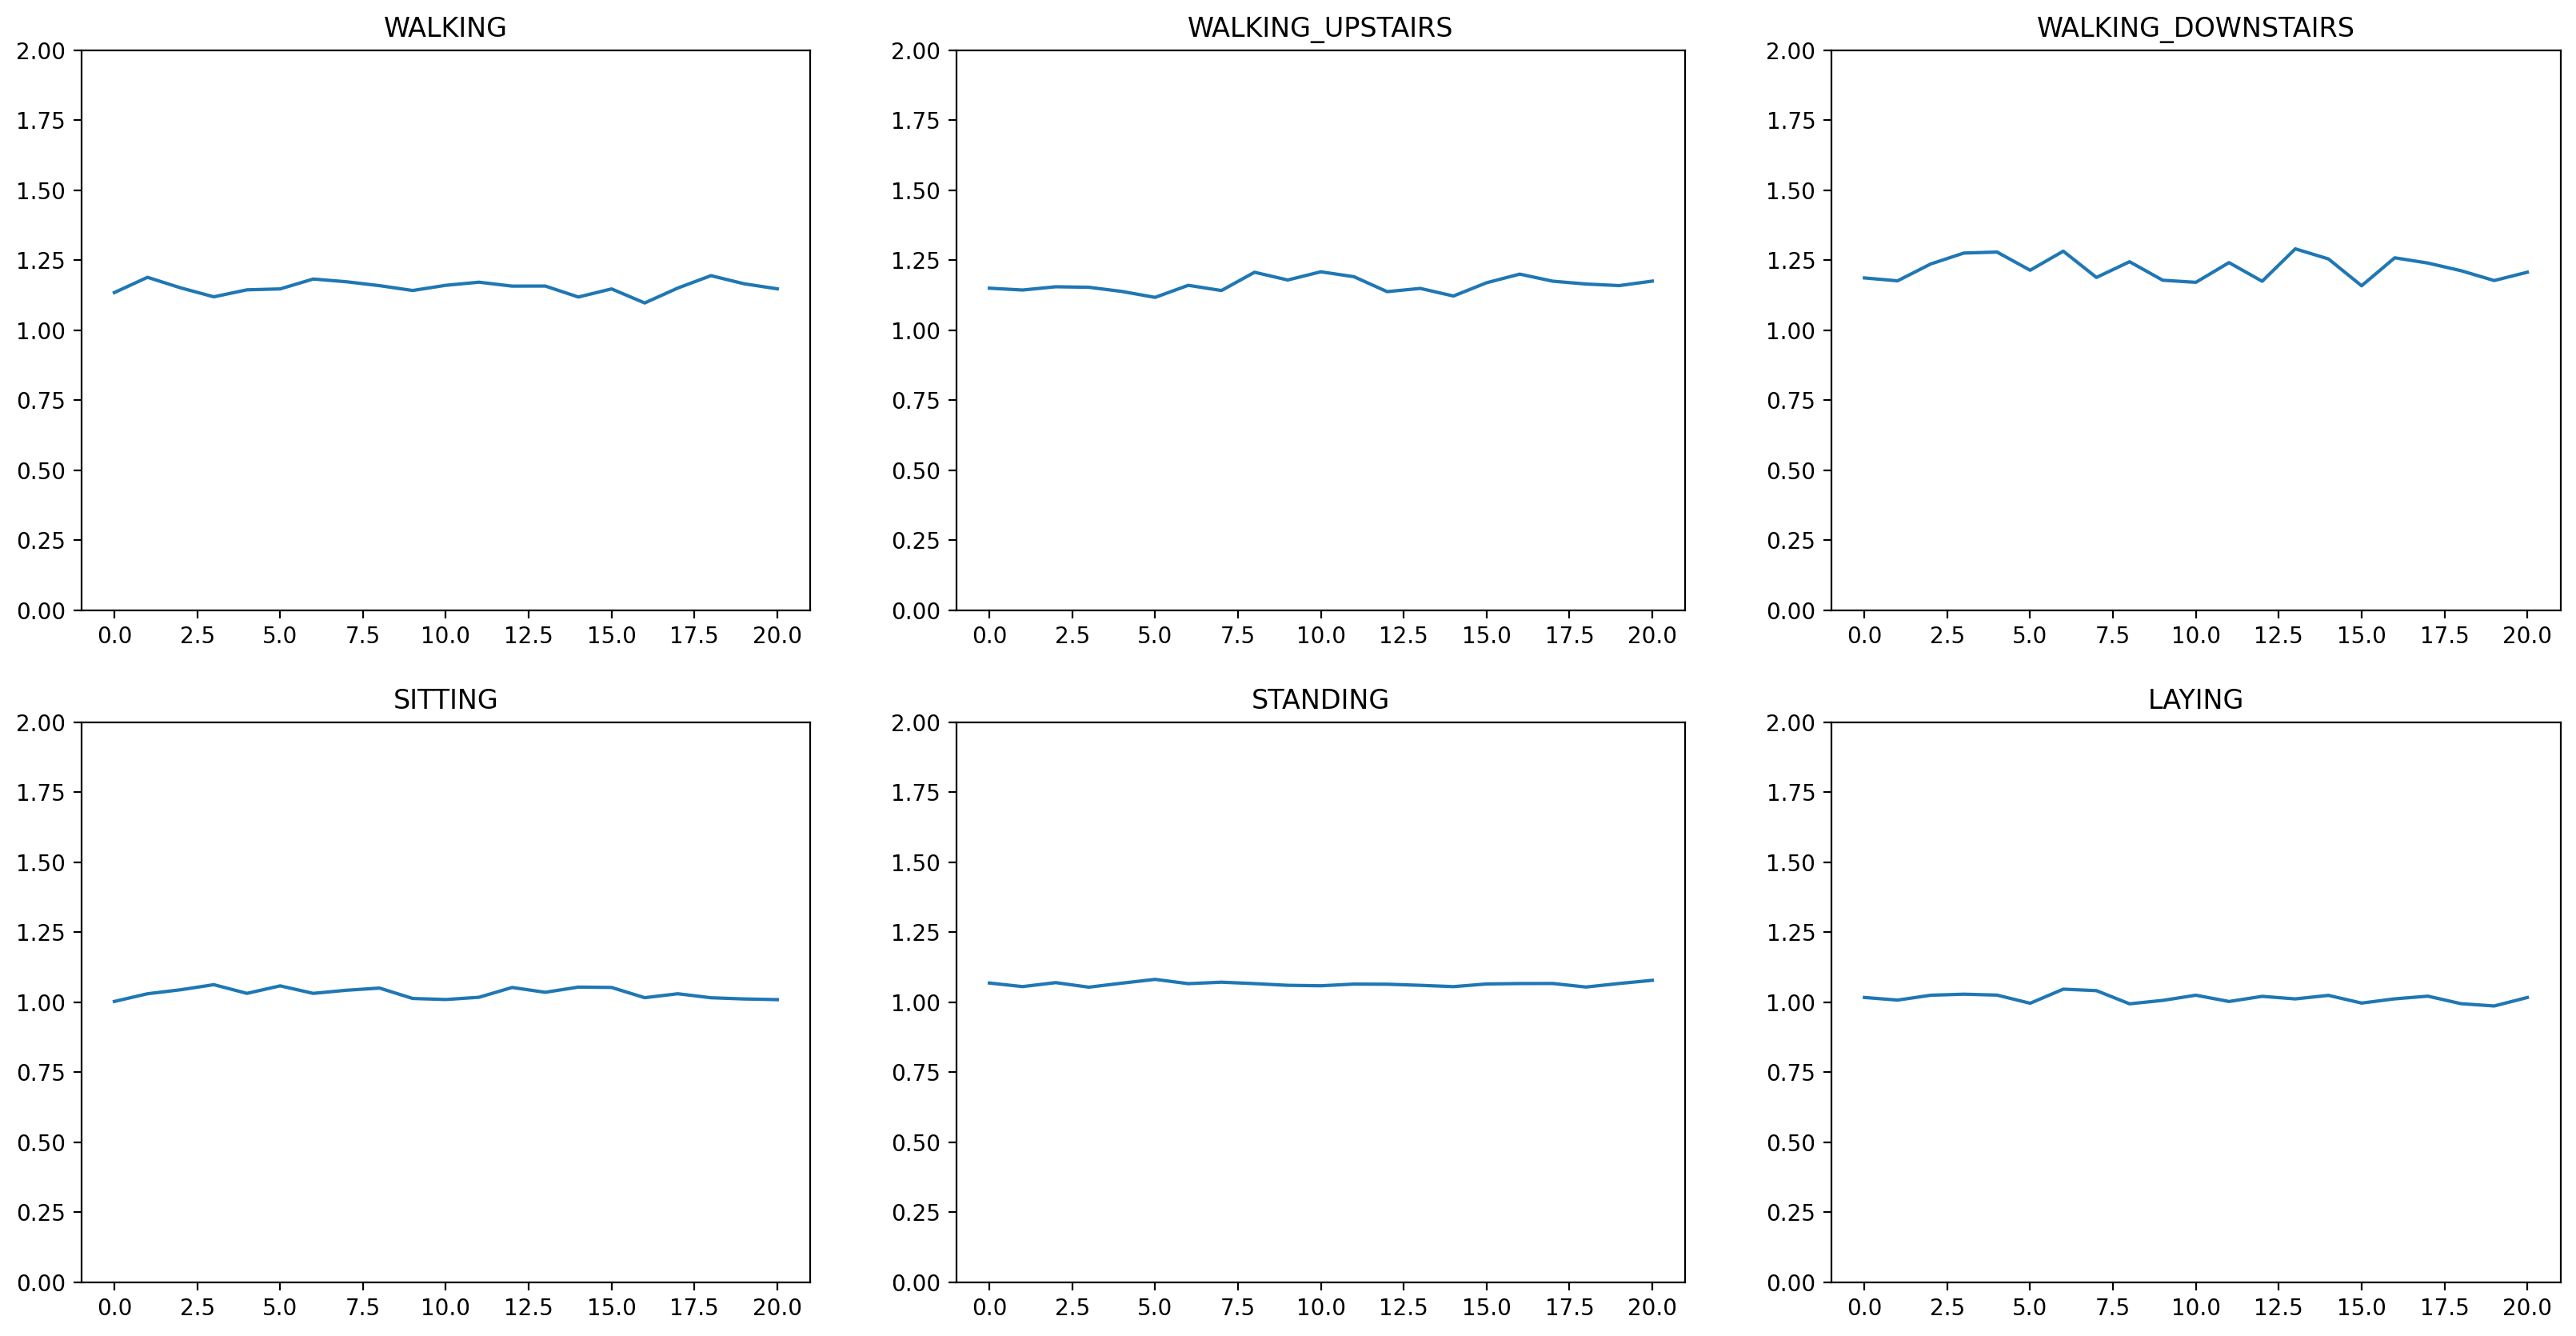

In [6]:
# Finding mean of linear acceleration of different activities
ACTIVITIES = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING',
}

m = [[] for _ in range(6)]
for i,j in enumerate(y_train):
  c = 0
  for g in range(500):
    c += np.sum(X_train[i][g]**2)
  m[j-1].append(c/500)

fig = plt.figure(figsize=(20, 10))
print("Standard deviations in Linear Acceleration in each of the activities:")
for i in range(6):
  ax = fig.add_subplot(2, 3, i+1)
  ax.plot(m[i],label="linear acc")
  ax.set_ylim(0, 2)
  ax.set_title(ACTIVITIES[i+1])
  print(ACTIVITIES[i+1], np.round(np.std(m[i]), 4))

#### NO; It is clearly evident from linear acceleration data and by the graphs that dynamic activities have more than TWICE as much deviation in their values than static activities.

### 3. Visualize the data using PCA. [1 marks]

In [ ]:
# Conversion of data to appropriate format to apply PCA.
from sklearn.decomposition import PCA

df = pd.DataFrame(np.concatenate((X_train.reshape((-1, 3)), np.repeat(y_train, 500).reshape(-1,1)), axis = 1), columns = ["accx", "accy", "accz", "Label"])
print(df.shape)


(63000, 4)


(126, 2)


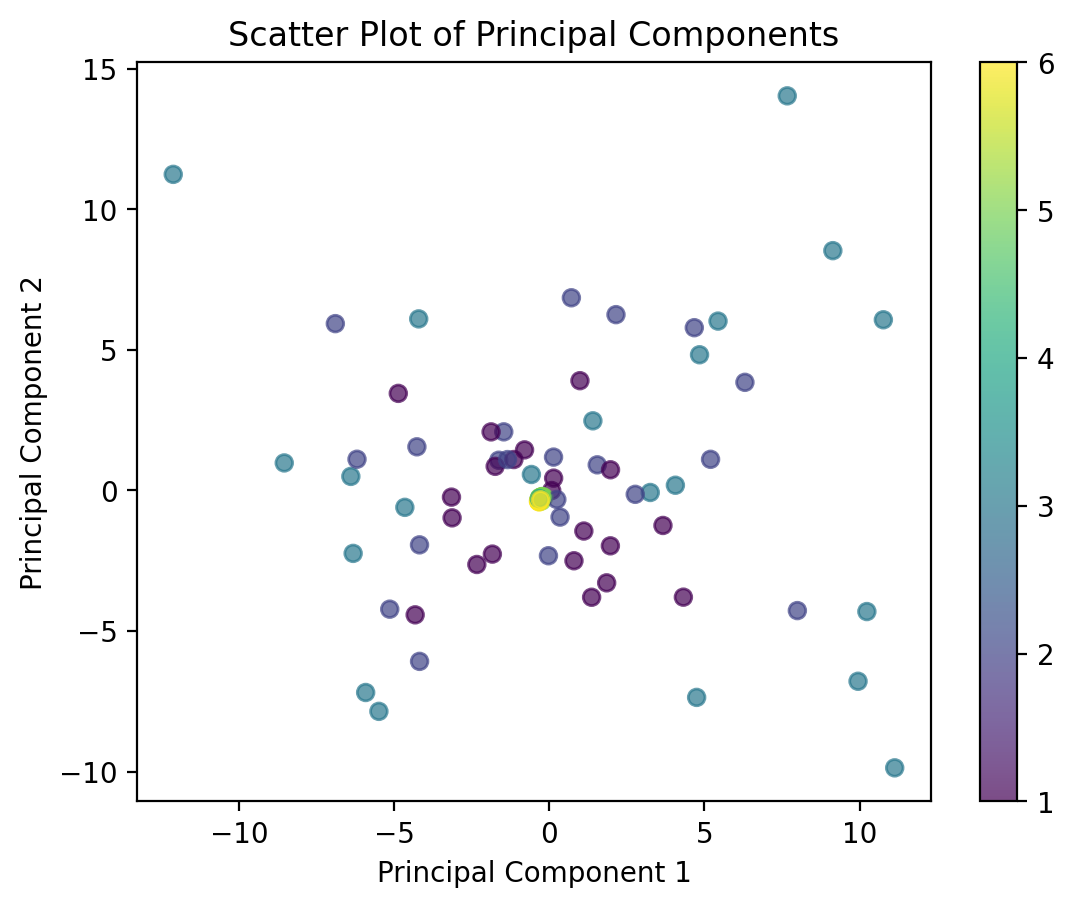

In [ ]:
# Applying PCA on the dataframe on total acceleration.

from sklearn.preprocessing import StandardScaler
df["totalacc"] = df["accx"]**2 + df["accy"]**2 + df["accz"]**2

pca = PCA(n_components=2)
xpca = pca.fit_transform(df["totalacc"].values.reshape(-1,500))
print(xpca.shape)

scatter = plt.scatter(xpca[:, 0],xpca[:, 1],c=y_train,cmap='viridis',alpha=0.7)
# print(xpca.size)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.colorbar(scatter)
plt.show()

*** Feature extraction started ***



*** Feature extraction finished ***
(126, 1152)


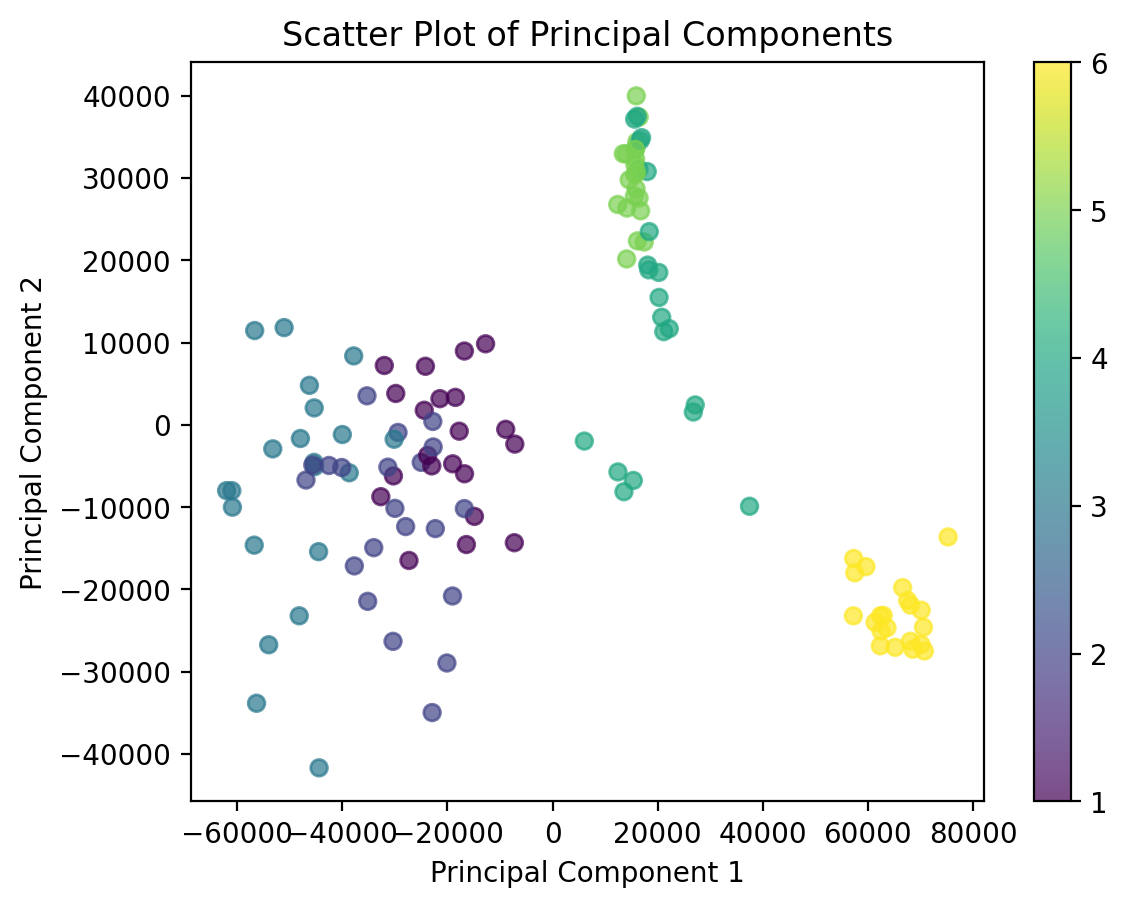

In [ ]:
# Applying PCA on features obtained by TSFEL featurizer library.

import tsfel

cfg = tsfel.get_features_by_domain()
features = tsfel.time_series_features_extractor(cfg,df[["accx","accy","accz"]], fs=50, window_size=500)

print(features.shape)


xpcatsfel = pca.fit_transform(features)
scattertsfel = plt.scatter(xpcatsfel[:, 0],xpcatsfel[:, 1],c=y_train,cmap='viridis',alpha=0.7)
# print(xpca.size)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.colorbar(scattertsfel)
plt.show()

TSFEL is better than PCA on total acceleration. The different activities are well classified in TSFEL as we can observe while in PCA on total acceleration, we can see kind of random plotting of points with presence of multiple outlier points.

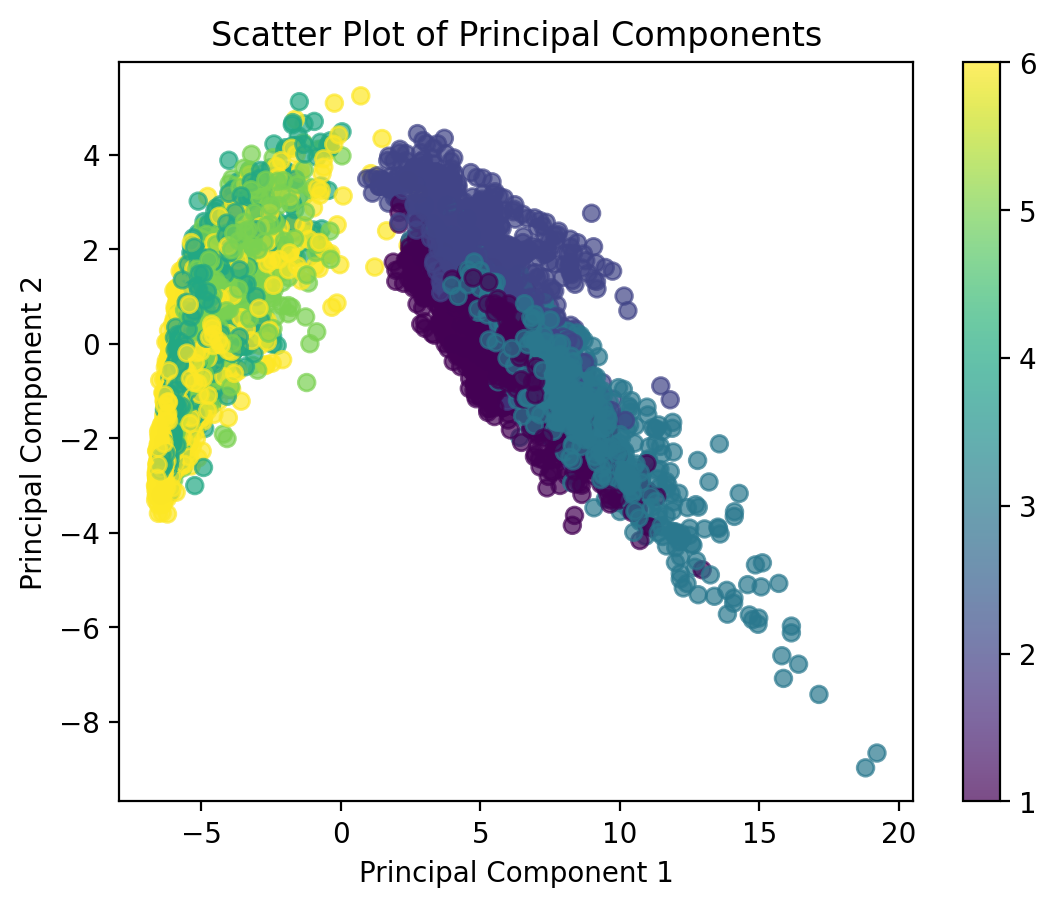

In [ ]:
# Applying PCA on raw data obtained from 561 feature vector's data.

xpcaraw = pca.fit_transform(x)
scatteraw = plt.scatter(xpcaraw[:, 0],xpcaraw[:, 1],c=yg,cmap='viridis',alpha=0.7)
# print(xpca.size)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.colorbar(scatteraw)
plt.show()

In [ ]:
# Finding correlation matrix for TSFEL data.

%%capture
corr = features.corr()
print(corr)

corrd = pd.DataFrame(corr)
conditionhc = corrd > 0.999
conditionredundant = corrd < 0.001



for column in corrd.columns:
    inhc = corrd.index[conditionhc[column]]  #    Get indices where condition is True
    for index in inhc:
        print(f"Feature 1: {column}, Feature 2: {index}")   
print()
print("Redundant Features")
for column in corrd.columns:
    i = corrd.index[conditionredundant[column]]
    for j in i:
        print(f"Feature 1: {column}, Feature 2: {j}") 

UsageError: Line magic function `%%capture` not found.


0.6481481481481481


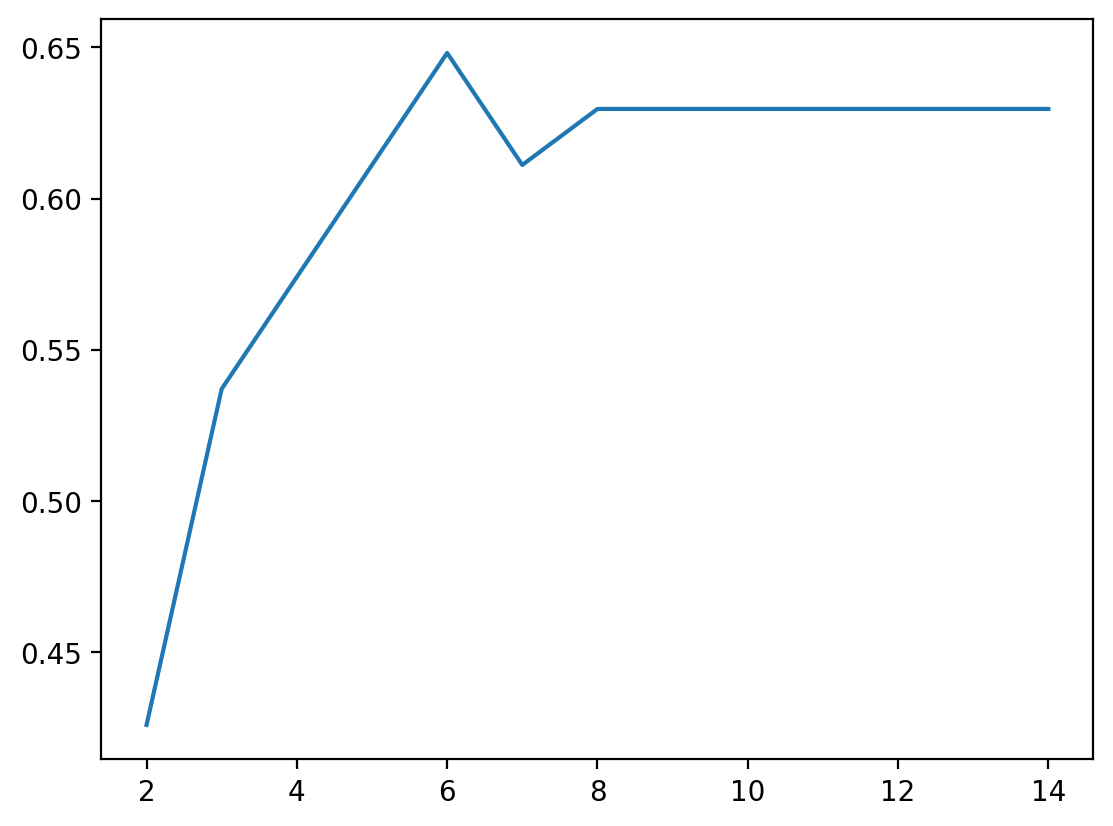

In [ ]:
# Applying Decision Tree Classifier on Combined data provided of acceleration in x,y,z directions.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.tree import export_graphviz
m = []
for i in range(2,15):
    clf = DecisionTreeClassifier(random_state=2,max_depth=i)
    clf.fit(X_train.reshape(-1,1500), y_train)
    y_pred = clf.predict(X_test.reshape(-1,1500))
    m.append(accuracy_score(y_test, y_pred))
# print(precision_score(y_test, y_pred),average=None)
# print(recall_score(y_test, y_pred),average=None)
plt.plot(range(2,15),m)
print(max(m))

In [ ]:


tf = pd.DataFrame(np.concatenate((X_test.reshape((-1, 3)), np.repeat(y_test, 500).reshape(-1,1)), axis = 1), columns = ["accx", "accy", "accz", "Label"])
features_test = tsfel.time_series_features_extractor(cfg,tf[["accx","accy","accz"]],fs=50,window_size=500)
features_test

*** Feature extraction started ***



*** Feature extraction finished ***


,accx_Absolute energy,accx_Area under the curve,accx_Autocorrelation,accx_Average power,accx_Centroid,accx_ECDF Percentile Count_0,accx_ECDF Percentile Count_1,accx_ECDF Percentile_0,accx_ECDF Percentile_1,accx_ECDF_0,...,accz_Wavelet variance_0,accz_Wavelet variance_1,accz_Wavelet variance_2,accz_Wavelet variance_3,accz_Wavelet variance_4,accz_Wavelet variance_5,accz_Wavelet variance_6,accz_Wavelet variance_7,accz_Wavelet variance_8,accz_Zero crossing rate
0,553.192673,10.010872,5.0,55.430128,4.951279,100.0,400.0,0.742390,1.309660,0.002,...,0.006583,0.020556,0.025592,0.028545,0.034961,0.044262,0.053273,0.059316,0.062127,66.0
1,496.578647,9.702003,3.0,49.757379,4.991823,100.0,400.0,0.776955,1.201567,0.002,...,0.015637,0.059982,0.096619,0.138860,0.180444,0.210190,0.208112,0.173597,0.125093,0.0
2,422.753737,8.726592,4.0,42.360094,4.876947,100.0,400.0,0.647065,1.148603,0.002,...,0.005568,0.035226,0.058800,0.072518,0.094563,0.125884,0.154179,0.169034,0.169699,6.0
3,502.911032,10.008690,3.0,50.391887,4.969185,100.0,400.0,0.997339,1.009725,0.002,...,0.000117,0.000401,0.000796,0.001163,0.001510,0.001943,0.002507,0.003194,0.003989,0.0
4,506.398790,10.043588,3.0,50.741362,4.989130,100.0,400.0,1.003767,1.009321,0.002,...,0.000050,0.000149,0.000291,0.000500,0.000745,0.001022,0.001352,0.001740,0.002174,0.0
5,550.221988,10.122887,4.0,55.132464,4.972272,100.0,400.0,0.742845,1.300388,0.002,...,0.006781,0.018047,0.034495,0.062853,0.102422,0.145287,0.177279,0.190583,0.189286,60.0
6,513.464639,9.943136,4.0,51.449363,4.961689,100.0,400.0,0.818254,1.176702,0.002,...,0.002140,0.005976,0.007330,0.011773,0.021170,0.035370,0.053248,0.073924,0.097001,0.0
7,524.544546,10.222018,2.0,52.559574,4.987353,100.0,400.0,1.022170,1.025731,0.002,...,0.000031,0.000092,0.000159,0.000231,0.000297,0.000361,0.000437,0.000529,0.000630,0.0
8,604.315970,9.931732,4.0,60.552702,5.036513,100.0,400.0,0.601997,1.546456,0.002,...,0.008654,0.034316,0.045905,0.047902,0.049050,0.054841,0.064337,0.075486,0.086735,77.0
9,442.144973,9.186801,5.0,44.303103,4.942232,100.0,400.0,0.740046,1.069223,0.002,...,0.002396,0.013688,0.037687,0.078358,0.127868,0.182657,0.241274,0.295358,0.331612,0.0


0.8888888888888888


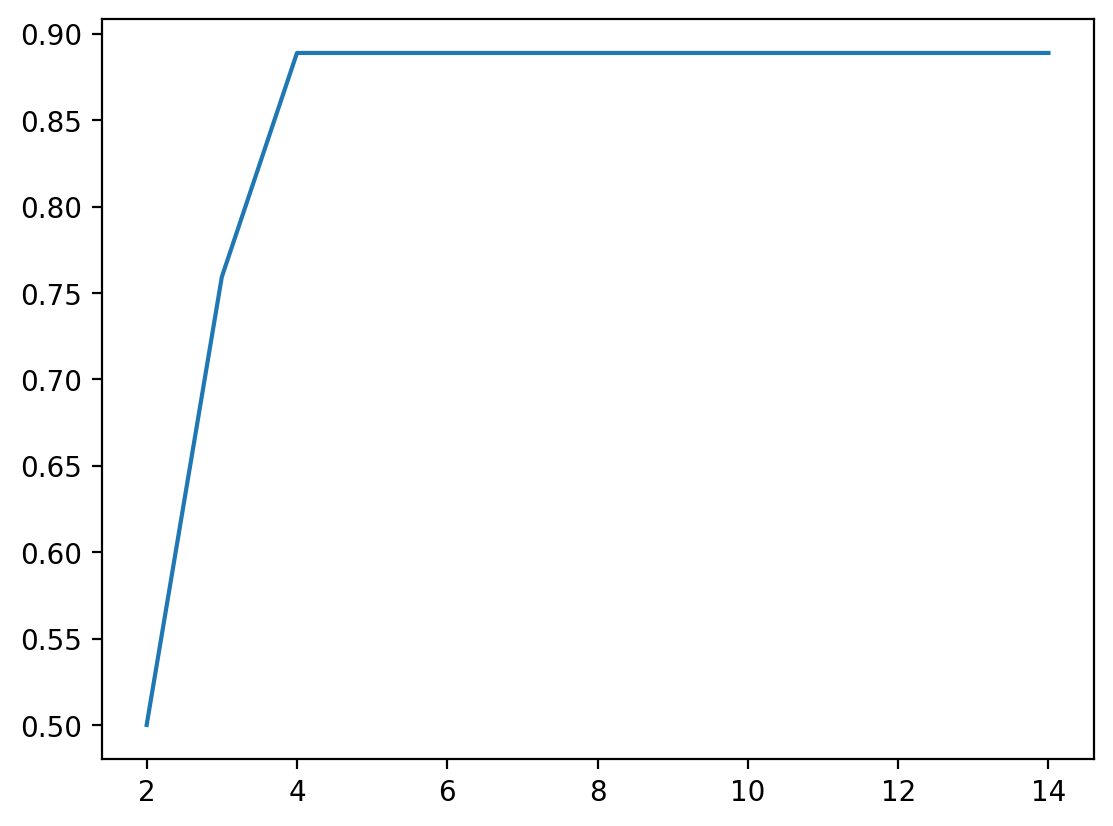

In [ ]:
m = []
for i in range(2,15):
    clf = DecisionTreeClassifier(random_state=2,max_depth=i)
    clf.fit(features, y_train)
    y_pred = clf.predict(features_test)
    m.append(accuracy_score(y_test, y_pred))

plt.plot(range(2,15),m)
print(max(m))

0.8754665761791652


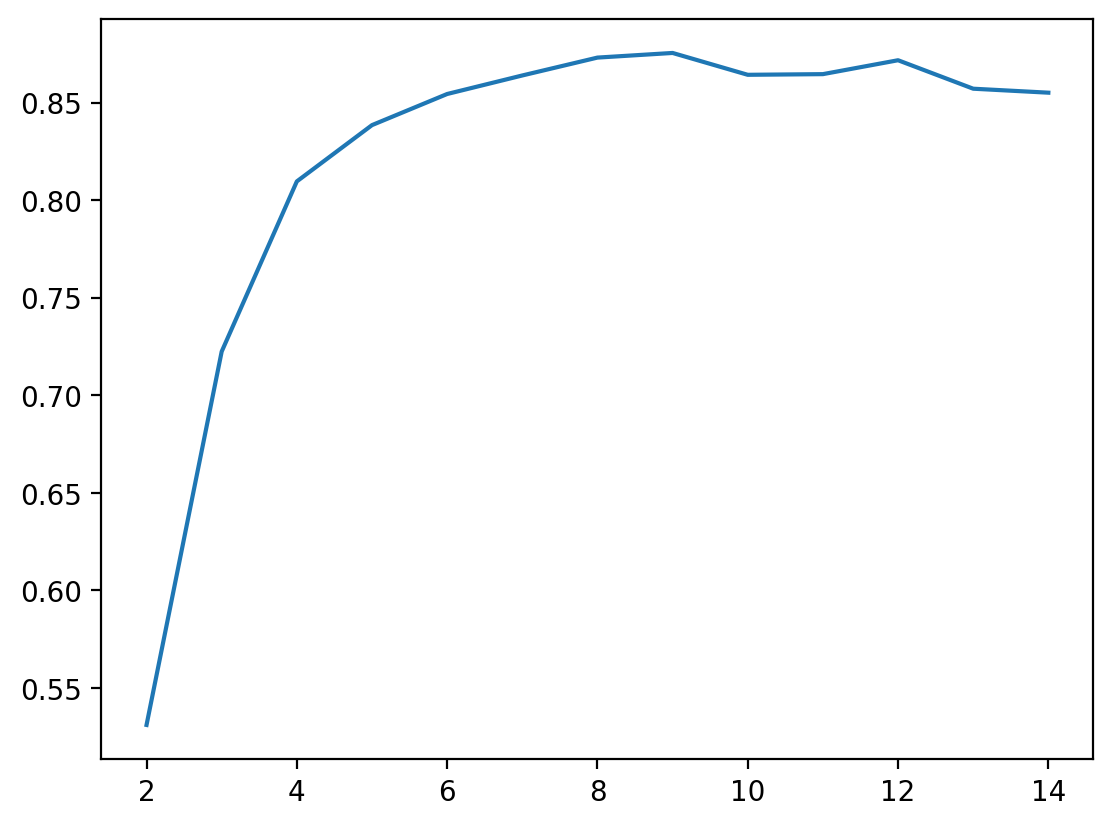

In [ ]:
m = []
for i in range(2,15):
    clf = DecisionTreeClassifier(random_state=2,max_depth=i)
    clf.fit(x,yg)
    yraw = clf.predict(xtest)
    m.append(accuracy_score(ytest, yraw))

plt.plot(range(2,15),m)
print(max(m))

#### _End of Task 1 and 2_